# <center>Predicting House Sale Prices with Linear Regression Machine Learning</center>

<div>
<img src="Data/0_YMZOAO8QE4bZ4_Rk.jpg" width="400"/>
</div>

In this project we are going to use linear regression model fitting methods to predict the prices of houses based on selected features of the houses.

We are going to be working with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

# Importing Libraries

In [1]:
# Standard Python libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Machine learning libraries and tools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Dealing with warnings and presentation of dataframes
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 99

# Reading in the Dataset

In [2]:
# Reading in the data with the columns names specified.
houses = pd.read_csv('./Data/AmesHousing.tsv', sep='\t',)

# We are also going to read in a secondary dataset for function procedure testing
test_houses = pd.read_csv('./Data/AmesHousing.tsv', sep='\t',)

Inspecting the data that we have just read in.

In [3]:
# Looking at the first five entries in the dataframe
test_houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Looking at the structure of the dataframe and noting where we have null values.

In [4]:
# Looking at the overall structure of the dataframe
test_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Below we divide the dataset in half to generate a training and testing dataframe. However, we are going to write a function which will automate this process, so it may be a redundant step.

In [5]:
# We are going to evenly divide the dataset into a training and testing dataset.

# Selecting the first half of the dataset to be the training dataset
train = houses[0:1460]

# Selecting the second half of the dataset to be the testing dataset
test = houses[1460:]

# Defining Functions

We are going to write some functions that can be used throughout this project. The transform features and select features functions will do very little for now, until we have explored some <mark>Data Enigineering</mark> and <mark>Feature Selection</mark>. We will update these functions later in the project.

In [6]:
# Defining a function to transform features in the dataframe. We will update this function later in the project, 
# when we discuss data engineering.

def transform_features(dataset):
    return dataset

# Defining a function that enables us to select features

def select_features(dataset):
    # Here we can manually select the columns we want to retain:
    feature_columns = ['Overall Cond', 'Gr Liv Area']
    
    # Selecting the columns from the dataset.
    selective_dataset = dataset[feature_columns]
    return selective_dataset

# Defining a function that we train and subsequently test a linear regression model a target column of 'SalePrice'.
# This function will divide the feature selective dataset into training and testing subsets.

# For now we are providing the features we want to test as columns, but once we have processed the dataset to only contain
# the features we are testing, we can remove the col variable and replace with 'features'

def train_and_test(selective_dataset,cols):
    # Calculate half the length of the dataset
    half_len = int(round(len(selective_dataset)/2,0))
    
    # We want to isolate the features which are not the target ('SalePrice')
    features =  selective_dataset.columns
    features =  features.drop('SalePrice').tolist()
    #print(type(features_updt))
    
    # Split dataset into training and testing subsets
    train_subset = houses[0:half_len]
    test_subset = houses[half_len:]
    
    # Initiate a linear regression model
    lin_mod = LinearRegression()
    
    # Train the model with the training dataset, targetting the 'SalePrice' feature
    lin_mod.fit(train_subset[cols], train_subset['SalePrice'])
    
    # Preditcting the prices of the test dataset
    test_predictions = lin_mod.predict(test_subset[cols])
    
    # Calculating misfit
    mse = mean_squared_error(test_predictions, test_subset['SalePrice'])
    rmse = np.sqrt(mse)
    
    return rmse

In [7]:
# Checking the train_and_test function

cols = ['Overall Cond', 'Gr Liv Area']
train_and_test(houses,cols)

57098.08831627263

# Feature Engineering

We want to prepare the dataframe so that the features provide meaningful contributions to any model learning performed.

__Numerical Columns__
- We are going to drop any column that is missing data in more than 5% of the entries. 
- For the numerical columns that have less than 5% missing values, we are going to replace the missing value with the most common value (the mode).

__Text Columns__
- To convert to categories (discussed below) - we require that there are no missing text values within the dataframe.

__Create new features__
- Absolute dates such as the <mark>Yr Sold</mark>, <mark>Year Built</mark>, or <mark>Year Remod/Add</mark> do not provide much meaning to the algorithm. This is especially true as the dataset is collected only between 2006 - 2010. We can convert these dates into meaningful features by making them relative to one another. For instance a new feature <mark>Build to Sale</mark> could be the the time difference between when the house was built and subsequently sold.

__Remove data leaks__
- Data related to the sale, such as <mark>Yr Sold</mark>, <mark>Mo Sold</mark>, <mark>Sale Type</mark>, and <mark>Sale Condition</mark>, are considered data leakages that provide potential information on the outcome of house sales, and are not related to the prediction of house price based on its physical attributes. These features need to be removed from the dataset to avoid influencing the machine learning.

__Drop columns that are unrelated to the house quality__
- Columns such as the <mark>PID</mark> and <mark>Order</mark> are related to the dataset and not the actual house.

In [8]:
test_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Removing or Replacing Empty Values

First we are going to remove any columns that are missing values for more than 5% of the entries.

In [9]:
# First we are going to remove any columns that are missing values for more than 5% of the entries
# Calculating how many entries 5% are:
five_per_len = int(round(len(test_houses)/20,0))
    
# Counting the null values in each column:
null_count = test_houses.isnull().sum()
# Keeping only the columns with less than 5% missing values
test_houses = test_houses[null_count[null_count < five_per_len].index]

There still remain columns that have null values. However as there are so few, we are going to replace these missing values with the mode of the column they are missing from.

In [10]:
# Next we are going to replace any remaining missing values in numeric columns with the mode of that column.
# Isolating the numeric columns
numeric_columns = test_houses.select_dtypes(['float','int'])

# Getting a list of the numeric column names
numeric_column_names = numeric_columns.columns.to_list()

# Looping through the numeric columns and replacing any missing values with the mode of that column
for col in numeric_column_names:
    test_houses[col] = test_houses[col].fillna(test_houses[col].mode(dropna=True).iloc[0])


Checking that we no longer have missing values in the numeric data.

In [11]:
# Checking that we no longer have missing values in the numeric columns
test_houses.select_dtypes(['float','int']).isnull().sum()

Order              0
PID                0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

There are some features which bear no influnce on the <mark>SalePrice</mark> of the properties, and so we will remove them.

In [12]:
# We are going to drop numeric columns that have no relevance to the house properties
test_houses = test_houses.drop(['Order','PID'],axis=1)

Some data pertains to the actual sale of the hosue. As we are trying to predict the <mark>SalePrice</mark> of the houses, we want to remove or modify as much data that reveals information on the actual sale. Such data being included in the machine learning process would be considered _data leakage_.

One of the ways we can transform this data, is to convert the absolute sale year, to a relative time between the <mark>Yr Sold</mark> and the <mark>Year Built</mark> or the <mark>Year Remod/Add</mark>.

In [13]:
# The Yr Sold column leaks information to our machine learning algorithm, so we are going to transform this feature to
# be the time between being built and being sold.
build_to_sale_time = test_houses['Yr Sold'] - test_houses['Year Built']

# Adding to the house dataset
test_houses['Build to Sale'] = build_to_sale_time

# In a similar vein, the year in which the house was remodified or added too will leak information, so we will also transform
# this columns in the same way
remod_to_sale_time = test_houses['Yr Sold'] - test_houses['Year Remod/Add']

# Adding to the house dataset
test_houses['Remod to Sale'] = remod_to_sale_time

Removing any negative values for these newly formed features - as they indicate that one of the <mark>Year Built</mark>, <mark>Year Remod/Add</mark>, or <mark>Yr Sold</mark> are incorrect.

In [14]:
# We need to check that there are no negative values for these new features we made 

# Locating indices which return negative values for 'Build to Sale' and removing them 
BtS_zero = test_houses['Build to Sale'] < 0
drop_BtS = BtS_zero[BtS_zero].index
test_houses = test_houses.drop(drop_BtS)

# Locating indices which return negative values for 'Remod to Sale' and removing them 
RtS_zero = test_houses['Remod to Sale'] < 0
drop_RtS = RtS_zero[RtS_zero].index
test_houses = test_houses.drop(drop_RtS)

Dropping the entried that have negative values.

In [15]:
# Now that we have made the 'Year Built' and 'Year Remod/Add' relative to the sale date, we can remove them
test_houses = test_houses.drop(['Year Built','Year Remod/Add'],axis=1)

Removing the absolute year values, which potentially leak sale data to the machine learning algorithm.

In [16]:
# We now want to remove features that leak information about the sale of the house.
leaky_features = ['Yr Sold','Mo Sold', 'Sale Condition', 'Sale Type']
test_houses = test_houses.drop(leaky_features,axis=1)

# Updating Transform Feature Function

We are going to add all the tested functionality to the <mark>transform_features</mark> function. This function will now perform all of our data engineering in one command.

In [17]:
# Defining a function to transform features in the dataframe. We will update this function later in the project, 
# when we discuss data engineering.

def transform_features(dataset):
    # First we are going to remove any columns that are missing values for more than 5% of the entries
    # Calculating how many entries 5% are:
    five_per_len = int(round(len(dataset)/20,0))
    
    # Counting the null values in each column:
    null_count = dataset.isnull().sum()
    # Keeping only the columns with less than 5% missing values
    dataset = dataset[null_count[null_count < five_per_len].index]
    
    # Next we are going to replace any remaining missing values in numeric columns with the mode of that column.
    # Isolating the numeric columns
    numeric_columns = dataset.select_dtypes(['float','int'])

    # Getting a list of the numeric column names
    numeric_column_names = numeric_columns.columns.to_list()

    # Looping through the numeric columns and replacing any missing values with the mode of that column
    for col in numeric_column_names:
        dataset[col] = dataset[col].fillna(dataset[col].mode(dropna=True).iloc[0])
    
    # We are going to drop numeric columns that have no relevance to the house properties
    dataset = dataset.drop(['Order','PID'],axis=1)
    
    # The Yr Sold column leaks information to our machine learning algorithm, so we are going to transform this feature to
    # be the time between being built and being sold.
    build_to_sale_time = dataset['Yr Sold'] - dataset['Year Built']

    # Adding to the house dataset
    dataset['Build to Sale'] = build_to_sale_time

    # In a similar vein, the year in which the house was remodified or added too will leak information, so we will also transform
    # this columns in the same way
    remod_to_sale_time = dataset['Yr Sold'] - dataset['Year Remod/Add']

    # Adding to the house dataset
    dataset['Remod to Sale'] = remod_to_sale_time
    
    # We need to check that there are no negative values for these new features we made 
    # Locating indices which return negative values for 'Build to Sale' and removing them 
    BtS_zero = dataset['Build to Sale'] < 0
    drop_BtS = BtS_zero[BtS_zero].index
    dataset = dataset.drop(drop_BtS)

    # Locating indices which return negative values for 'Remod to Sale' and removing them 
    RtS_zero = dataset['Remod to Sale'] < 0
    drop_RtS = RtS_zero[RtS_zero].index
    dataset = dataset.drop(drop_RtS)
    
    # Now that we have made the 'Year Built' and 'Year Remod/Add' relative to the sale date, we can remove them
    dataset = dataset.drop(['Year Built','Year Remod/Add'],axis=1)
    
    # We now want to remove features that leak information about the sale of the house.
    leaky_features = ['Yr Sold','Mo Sold', 'Sale Condition', 'Sale Type']
    dataset = dataset.drop(leaky_features,axis=1)

    
    return dataset

# Feature Selection

Now that we have done a lot of the basic corrections to the data, we want to select the features that we will use to focus machine learning on. 

__Correlations__

- We can look at the correlation between features that are represented numerically with the <mark>SalePrice</mark>. 
- Remove any features that present low correlation.

__Transform data to correct format__

- Perform scaling on continuous numerical features, so that it is normalised (a value of 0-1).
- Convert nominal data into numerical representations.
    - Any data with limited unique text representations (objects) needs to be converted into categories. 
    - These data then need to be converted into dummies (providing a binary 0 or 1 if the feature category is present).

The first thing we are going to do in feature selection is inspect how many missing values with have in the object (category) based columns.

In [18]:
test_houses.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2927 non-null   object
 1   Street          2927 non-null   object
 2   Lot Shape       2927 non-null   object
 3   Land Contour    2927 non-null   object
 4   Utilities       2927 non-null   object
 5   Lot Config      2927 non-null   object
 6   Land Slope      2927 non-null   object
 7   Neighborhood    2927 non-null   object
 8   Condition 1     2927 non-null   object
 9   Condition 2     2927 non-null   object
 10  Bldg Type       2927 non-null   object
 11  House Style     2927 non-null   object
 12  Roof Style      2927 non-null   object
 13  Roof Matl       2927 non-null   object
 14  Exterior 1st    2927 non-null   object
 15  Exterior 2nd    2927 non-null   object
 16  Mas Vnr Type    2904 non-null   object
 17  Exter Qual      2927 non-null   object
 18  Exter Co

We can see that there are only a limited number of rows that do not contain text strings. For simplicity, we are going to drop these rows from the datafram.

In [19]:
# Dropping rows that have missing values.
test_houses = test_houses.dropna(axis=0)

## Numerical Feature Correlations with Sale Price

The next thing we are going to do in the feature selection is look at what numerical features correlate well with the <mark>SalePrice</mark>.

<AxesSubplot:>

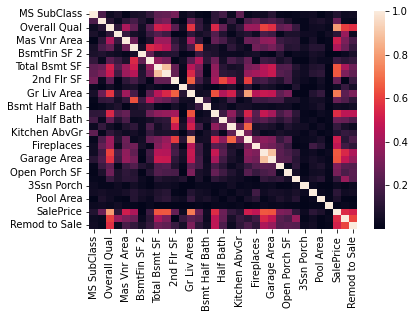

In [20]:
# Investigating what numerical features correlate well with the sale price

numerical_test_houses = test_houses.select_dtypes(include=['float','int'])

# Make correlation martrix with absolute values
corrmat = np.abs(numerical_test_houses.corr())

sns.heatmap(corrmat)

Filtering out the features with stronger correlations with the <mark>SalePrice</mark>.

<AxesSubplot:>

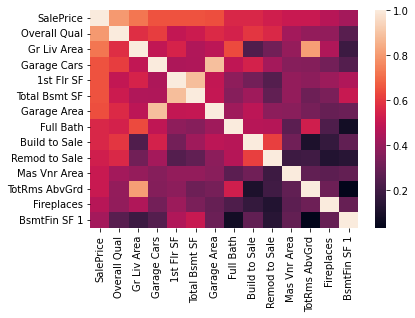

In [21]:
# Determining the correlations with SalePrice
corr_sorted = corrmat['SalePrice'].sort_values(ascending=False)
# Only keeping strong correlations that are over 0.4
strong_corrs = corr_sorted[corr_sorted > 0.4]

# We can take the weakly correlated features and remove them from the dataset
weak_corrs = corr_sorted[corr_sorted < 0.4]
test_houses = test_houses.drop(weak_corrs.index,axis=1)

corrmat = np.abs(numerical_test_houses[strong_corrs.index].corr())

sns.heatmap(corrmat)

The above heatmap show the features that have correlations > 0.4. We have removed any numerical features with correlations weaker than this.

We can see that there is high correlations between <mark>Garage Area</mark> and <mark>Garage Cars</mark>, as well as <mark>TotRms AbvGrd</mark> and <mark>Gr Liv Area</mark>. Because <mark>Gr Liv Area</mark> and <mark> Area</mark> are continuous variables that capture more nuance, we'll drop the <mark>TotRms AbvGrd</mark> and <mark>Garage Cars</mark>.

In [22]:
# Dropping 'TotRms AbvGrd' and 'Garage Cars'
test_houses = test_houses.drop(['Garage Cars','TotRms AbvGrd'],axis=1)

Inspecting the remaining numerical features in the dataset.

In [23]:
test_houses.select_dtypes(include=['float','int'])

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Fireplaces,Garage Area,SalePrice,Build to Sale,Remod to Sale
0,6,112.0,639.0,1080.0,1656,1656,1,2,528.0,215000,50,50
1,5,0.0,468.0,882.0,896,896,1,0,730.0,105000,49,49
2,6,108.0,923.0,1329.0,1329,1329,1,0,312.0,172000,52,52
3,7,0.0,1065.0,2110.0,2110,2110,2,2,522.0,244000,42,42
4,5,0.0,791.0,928.0,928,1629,2,1,482.0,189900,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,0.0,819.0,1003.0,1003,1003,1,0,588.0,142500,22,22
2926,5,0.0,301.0,864.0,902,902,1,0,484.0,131000,23,23
2927,5,0.0,337.0,912.0,970,970,1,0,0.0,132000,14,14
2928,5,0.0,1071.0,1389.0,1389,1389,1,1,418.0,170000,32,31


## Normalising the numerical features.

To make the features bear similar weights to one another, we are going to nromalise them to have values ranging from 0-1.

In [24]:
# Finally we are going to scale these numerical values to have values from 0-1

# Including only the columns which have numerical values
numerical_test_houses = test_houses.select_dtypes(include=['float','int'])

# Dropping the 'SalePrice' column so that it is not included in the scaling
numerical_test_houses = numerical_test_houses.drop('SalePrice', axis=1)

# Getting the columns for scaling
num_cols = numerical_test_houses.columns

# Looping through the columns we want to scale
for col in num_cols:
    # Normalising each numerical column and replacing it in the dataset.
    test_houses[col] = (numerical_test_houses[col] - numerical_test_houses[col].min()) / \
    (numerical_test_houses[col].max() - numerical_test_houses[col].min())

Inspecting the results of the normalisation.

In [25]:
test_houses.select_dtypes(include=['float','int'])

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Fireplaces,Garage Area,SalePrice,Build to Sale,Remod to Sale
0,0.555556,0.07000,0.113218,0.162365,0.291482,0.238586,0.25,0.50,0.354839,215000,0.367647,0.833333
1,0.444444,0.00000,0.082920,0.129392,0.114119,0.093410,0.25,0.00,0.490591,105000,0.360294,0.816667
2,0.555556,0.06750,0.163536,0.203830,0.215169,0.176122,0.25,0.00,0.209677,172000,0.382353,0.866667
3,0.666667,0.00000,0.188696,0.333888,0.397433,0.325310,0.50,0.50,0.350806,244000,0.308824,0.700000
4,0.444444,0.00000,0.140149,0.137052,0.121587,0.233429,0.50,0.25,0.323925,189900,0.095588,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.555556,0.00000,0.145110,0.149542,0.139090,0.113849,0.25,0.00,0.395161,142500,0.161765,0.366667
2926,0.444444,0.00000,0.053331,0.126395,0.115519,0.094556,0.25,0.00,0.325269,131000,0.169118,0.383333
2927,0.444444,0.00000,0.059709,0.134388,0.131389,0.107545,0.25,0.00,0.000000,132000,0.102941,0.233333
2928,0.444444,0.00000,0.189759,0.213822,0.229172,0.187584,0.25,0.25,0.280914,170000,0.235294,0.516667


# Dealing with categorical data

Now that we have the numerical data in a manageable format, we need to convert the remaining categorical data into a format that is useful to the regression algorithms. The categorical data appears as <mark>'object'</mark> data.

In [26]:
test_houses.select_dtypes(include=['object'])

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Paved Drive
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,P
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Y
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Y
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Y
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,Y
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Y
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,Y


We are going to go through this categorical data and turn it into categories, which gives each unique <mark>'object'</mark> in a feature column, a unique values.

While we are converting to categories, we are also going to tally how many of each unique category there are in any one feature column. If any one unique category comprises 95% of that data feature, we are going to remove it from the dataframe completely for a lack of variance (that feature won't help us predict the <mark>SalePrice</mark>.

In [27]:
# Getting the remaining features which are object (category) based
text_categorical = test_houses.select_dtypes(include=['object'])
categorical_columns = text_categorical.columns

# Setting empty lists to record what columns were kept and which were removed
kept_object_features = []
removed_object_features = []

# Changing to categories and calculating the proportion of entries that are a single type - we are going to reject any feature
# that is more than 95% one value for being too low in variance.
for col in categorical_columns:
    dummy_variable = test_houses[col].astype('category')
    
    # Calculating the proportion of values in a single category
    prop = dummy_variable.cat.codes.value_counts().max() / dummy_variable.cat.codes.value_counts().sum()
    
    # Using conditional statement to record which object based columns have low or high variance
    if prop < 0.95:
        kept_object_features.append(col)
        test_houses[col] = test_houses[col].astype('category')
    else:
        test_houses = test_houses.drop(col,axis=1)
        removed_object_features.append(col)

Below are the features that we have removed as one category comprised 95%, or more, of that dataset.

In [28]:
print(kept_object_features)

['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Paved Drive']


In [29]:
# Looking at what features are going to be removed
print(removed_object_features)

['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating']


One issue with the conversion to categories is that they are assigned arbitrary integer values (e.g. 2, 3, 4 etc..). This can provide a bias within the regression. Instead, we can simply indicate whether each house has that category of feature, or not, with a binary 0 or 1. To do this, we convert the categories to dummy columns. 

In [30]:
categorical_columns = test_houses.select_dtypes(include=['category'])
# Make correlation martrix with absolute values

for col in categorical_columns:
    col_dummies = pd.get_dummies(test_houses[col])
    test_houses = pd.concat([test_houses, col_dummies], axis = 1)
    del test_houses[col]

We now have all the feature columns that we want to use for predicting <mark>SalePrice</mark>, and they are all in the same format, ranging from 0 - 1. The final thing we are going to do before updating the <mark>select_features</mark> function, is rearrange cthe dataframe, so that <mark>SalePrice</mark> is the final column. This is not necessary, but tidy house keeping.

In [31]:
# Storing the 'SalePrice' feature column
sale_price = test_houses['SalePrice']

# Dropping the 'SalePrice' for now
test_houses = test_houses.drop('SalePrice', axis=1)

# Re-adding the 'SalePrice' column to the end of the dataframe
test_houses = pd.concat([test_houses, sale_price], axis=1)

In [32]:
test_houses

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Fireplaces,Garage Area,Build to Sale,Remod to Sale,C (all),FV,I (all),RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,...,Fa,Gd,Po,TA,Av,Gd,Mn,No,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Ex,Fa,Gd,Po,TA,N,Y,FuseA,FuseF,FuseP,Mix,SBrkr,Ex,Fa,Gd,Po,TA,Maj1,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,N,P,Y,SalePrice
0,0.555556,0.07000,0.113218,0.162365,0.291482,0.238586,0.25,0.50,0.354839,0.367647,0.833333,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,215000
1,0.444444,0.00000,0.082920,0.129392,0.114119,0.093410,0.25,0.00,0.490591,0.360294,0.816667,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,105000
2,0.555556,0.06750,0.163536,0.203830,0.215169,0.176122,0.25,0.00,0.209677,0.382353,0.866667,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,172000
3,0.666667,0.00000,0.188696,0.333888,0.397433,0.325310,0.50,0.50,0.350806,0.308824,0.700000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,244000
4,0.444444,0.00000,0.140149,0.137052,0.121587,0.233429,0.50,0.25,0.323925,0.095588,0.200000,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.555556,0.00000,0.145110,0.149542,0.139090,0.113849,0.25,0.00,0.395161,0.161765,0.366667,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,142500
2926,0.444444,0.00000,0.053331,0.126395,0.115519,0.094556,0.25,0.00,0.325269,0.169118,0.383333,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,131000
2927,0.444444,0.00000,0.059709,0.134388,0.131389,0.107545,0.25,0.00,0.000000,0.102941,0.233333,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,132000
2928,0.444444,0.00000,0.189759,0.213822,0.229172,0.187584,0.25,0.25,0.280914,0.235294,0.516667,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,170000


# Updating Select Features Function


In [33]:
# Defining a function that enables us to select features

def select_features(dataset):
    # Dropping rows that have missing values.
    selective_dataset = dataset.dropna(axis=0)
    
    # Investigating what numerical features correlate well with the sale price

    numerical_test_houses = selective_dataset.select_dtypes(include=['float','int'])

    # Make correlation martrix with absolute values
    corrmat = np.abs(numerical_test_houses.corr())

    # Determining the correlations with SalePrice
    corr_sorted = corrmat['SalePrice'].sort_values(ascending=False)
    # Only keeping strong correlations that are over 0.4
    strong_corrs = corr_sorted[corr_sorted > 0.4]

    # We can take the weakly correlated features and remove them from the dataset
    weak_corrs = corr_sorted[corr_sorted < 0.4]
    selective_dataset =selective_dataset.drop(weak_corrs.index,axis=1)
    
    # Dropping 'TotRms AbvGrd' and 'Garage Cars'
    selective_dataset = selective_dataset.drop(['Garage Cars','TotRms AbvGrd'], axis=1)
    
    # We are going to scale these numerical values to have values from 0-1
    # Including only the columns which have numerical values
    numerical_features = selective_dataset.select_dtypes(include=['float','int'])

    # Dropping the 'SalePrice' column so that it is not included in the scaling
    numerical_features = numerical_features.drop('SalePrice', axis=1)

    # Getting the columns for scaling
    num_cols = numerical_features.columns

    ###### FOR SOME REASON - IF WE NORMALISE THESE COLUMNS IT BLOWS OUT THE RMSE VALUES #####
    ###### HAVE BLOCKED OUT FOR NOW - WILL INVESTIGATE LATER ######
    
#     # Looping through the columns we want to scale
#     for col in num_cols:
#         # Normalising each numerical column and replacing it in the dataset.
#         selective_dataset[col] = (selective_dataset[col] - selective_dataset[col].min()) / \
#         (selective_dataset[col].max() - selective_dataset[col].min())
    
    #Getting the remaining features which are object (category) based
    text_categorical = selective_dataset.select_dtypes(include=['object'])
    categorical_columns = text_categorical.columns

    #Setting empty lists to record what columns were kept and which were removed
    kept_object_features = []
    removed_object_features = []

    #Changing to categories and calculating the proportion of entries that are a single type -
    #we are going to reject any feature that is more than 95% one value for being too low in variance.
    for col in categorical_columns:
       dummy_variable = selective_dataset[col].astype('category')
    
       # Calculating the proportion of values in a single category
       prop = dummy_variable.cat.codes.value_counts().max() / dummy_variable.cat.codes.value_counts().sum()
    
       # Using conditional statement to record which object based columns have low or high variance
       if prop < 0.95:
           kept_object_features.append(col)
           selective_dataset[col] = selective_dataset[col].astype('category')
       else:
           selective_dataset = selective_dataset.drop(col,axis=1)
           removed_object_features.append(col)
    
    categorical_columns = selective_dataset.select_dtypes(include=['category'])

    for col in categorical_columns:
       col_dummies = pd.get_dummies(selective_dataset[col])
       selective_dataset = pd.concat([selective_dataset, col_dummies], axis = 1)
       del selective_dataset[col]
        
    return selective_dataset

# Train and Test Implementation

Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. We are going to add a parameter named k that controls the type of cross validation that occurs.

- The optional k parameter will accept integer values, with a default value of 0.
- When k equals 0, we will perform holdout validation (what we already implemented):
    - Select the first 50% of rows and assign to train.
    - Select the remaining rows and assign to test.
    - Train on train and test on test.
    - Compute the RMSE and return.
- When k equals 1, perform simple cross validation:
    - Shuffle the ordering of the rows in the data frame.
    - Select the first 50% rows and assign to fold_one.
    - Select the remaining rows and assign to fold_two.
    - Train on fold_one and test on fold_two.
    - Train on fold_two and test on fold_one.
    - Compute the average RMSE and return.
- When k is greater than 0, implement k-fold cross validation using k folds:
    - Perform k-fold cross validation using k folds.
    - Calculate the average RMSE value and return this value.

In [34]:
def train_and_test(selective_dataset, k):
    
    # Initiate a linear regression model
    lin_mod = LinearRegression()
    
    # Selecting features we want to train on (everything except for 'SalePrice', as this is the target)
    features =  selective_dataset.columns
    features =  features.drop('SalePrice').tolist()

    # If k = 0, we will perform a simple holdout validation
    if k == 0:
    
        # Calculate half the length of the dataset
        half_len = int(round(len(selective_dataset)/2,0))
    
        # Split dataset into training and testing subsets
        train_subset = selective_dataset[0:half_len]
        test_subset = selective_dataset[half_len:]
    
        # Train the model with the training dataset, targetting the 'SalePrice' feature
        lin_mod.fit(train_subset[features], train_subset['SalePrice'])
    
        # Preditcting the prices of the test dataset
        test_predictions = lin_mod.predict(test_subset[features])
    
        # Calculating misfit
        mse = mean_squared_error(test_predictions, test_subset['SalePrice'])
        rmse = np.sqrt(mse)
    
        return rmse
    
    # If k = 1, we will perform a simple holdout validation
    if k == 1:
        
        # Calculate half the length of the dataset
        half_len = int(round(len(selective_dataset)/2,0))
        
        # We are going to shuffle the dataframe
        shuffled = selective_dataset.sample(frac=1).reset_index()
    
    
        # Split dataset into two different folds
        fold_one = shuffled[0:half_len]
        fold_two = shuffled[half_len:]
    
        # Train the model with the first fold dataset, targetting the 'SalePrice' feature
        lin_mod.fit(fold_one[features], fold_one['SalePrice'])
    
        # Predicting the prices of the second fold dataset
        fold_two_predictions = lin_mod.predict(fold_two[features])
    
        # Calculating misfit
        mse_1 = mean_squared_error(fold_two_predictions, fold_two['SalePrice'])
        rmse_1 = np.sqrt(mse_1)
        
        #### Reversing the training and testing datasets for holdout validation ####
        
        # Train the model with the second fold dataset, targetting the 'SalePrice' feature
        lin_mod.fit(fold_two[features], fold_two['SalePrice'])
    
        # Predicting the prices of the first fold dataset
        fold_one_predictions = lin_mod.predict(fold_one[features])
    
        # Calculating misfit 
        mse_2 = mean_squared_error(fold_one_predictions, fold_one['SalePrice'])
        rmse_2 = np.sqrt(mse_2)
        average_rmse = (rmse_1 + rmse_2) / 2 
        print(rmse_1, rmse_2)
        
        return average_rmse
    
    elif k > 1:
        kf = KFold(k, shuffle=True, random_state=1)
        
        # Using cross_val_score to return the mean square values for LinearRegression testing on the different 
        # partitions of k folds:
        mses = cross_val_score(lin_mod, selective_dataset[features], selective_dataset[['SalePrice']], 
                           scoring='neg_mean_squared_error', cv=kf)
        # Calculating RMSES
        
        rmses = rmses = (np.abs(mses))**0.5
        #print(rmses)
        average_rmse = sum(rmses)/len(rmses)
        return average_rmse

In [35]:
dataset = transform_features(houses)
selective_dataset = select_features(dataset)
train_and_test(selective_dataset, 100)

24497.549325407716

# Investigating Cross-Validation Fold

Before we finish, we are going to look at the effects of increasing the number of folds in the cross-validation of the linear regression model. Typically, the more folds included in the analysis, the smaller the RMSE value, but the greater the computational expense.

In [36]:
# Testing the cross validation algorith for a range of different folds, to see which is optimal:

# Initiating dictionaries for the average RMSE value and standard deviation in RMSEs
avg_rmse_fold = {}

# Looping through a range of fold values to test
for fold in range(2,50):
    avg_rmse= train_and_test(selective_dataset,fold)
    
    avg_rmse_fold[fold] = avg_rmse
    

Text(0.5, 1.0, 'Average RMSE versus cross validation fold')

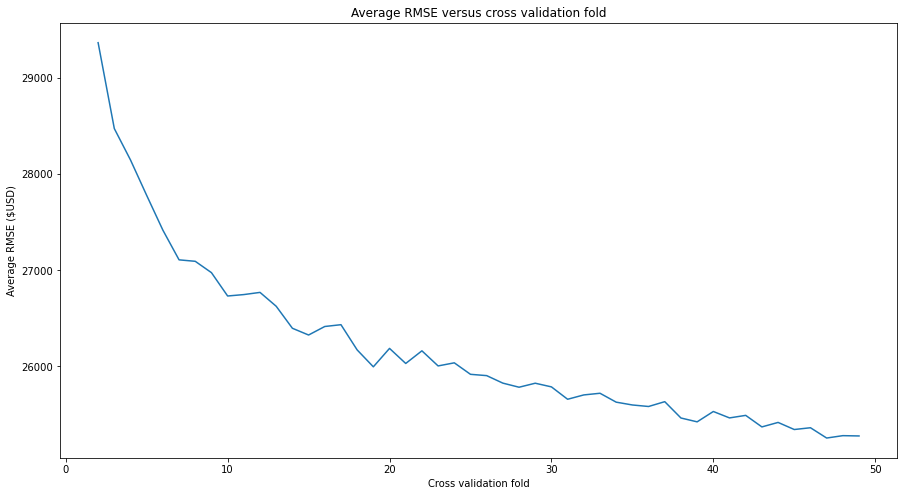

In [37]:
# Converting dictionary to series for plotting.
avg_rmse_for_plot = pd.Series(avg_rmse_fold)

# Initiating a figure and specifying it's size
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

# Plotting the data
plt.plot(avg_rmse_for_plot.index, avg_rmse_for_plot)
plt.xlabel('Cross validation fold')
plt.xticks(np.arange(0, 50+1, 10))
plt.ylabel('Average RMSE ($USD)')
plt.title('Average RMSE versus cross validation fold')

## Observation

We can see that with an increasing number of fold (k) in our cross-validation, we bring the average RMSE in predicted house prices down. Most of the improvement occurs when increasing the fold to 8, beyond that there is diminishing improvement for increased fold.

# Concluding Remarks

We have established functions to engineer our dataset into useable data, select the appropriate features, and perform linear regression modelling with any number of folds for cross-validation.

What it has shown is that we can typically predict the <mark>SalePrice</mark> of houses to within \\$25,000 - \\$30,000. 